In [20]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [2]:
#Importing the dataset
df =pd.read_csv('../data/smoking.csv')


# look the data set
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [3]:
# looking the shape DataSet
df.shape

(55692, 27)

In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [6]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [5]:
# look  describe data set
df.describe().round(2)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,...,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00
mean,27845.50,44.18,164.65,65.86,82.05,1.01,1.01,1.03,1.03,121.49,...,57.29,114.96,14.62,1.09,0.89,26.18,27.04,39.95,0.21,0.37
std,16077.04,12.07,9.19,12.82,9.27,0.49,0.49,0.16,0.16,13.68,...,14.74,40.93,1.56,0.40,0.22,19.36,30.95,50.29,0.41,0.48
min,0.00,20.00,130.00,30.00,51.00,0.10,0.10,1.00,1.00,71.00,...,4.00,1.00,4.90,1.00,0.10,6.00,1.00,1.00,0.00,0.00
25%,13922.75,40.00,160.00,55.00,76.00,0.80,0.80,1.00,1.00,112.00,...,47.00,92.00,13.60,1.00,0.80,19.00,15.00,17.00,0.00,0.00
50%,27845.50,40.00,165.00,65.00,82.00,1.00,1.00,1.00,1.00,120.00,...,55.00,113.00,14.80,1.00,0.90,23.00,21.00,25.00,0.00,0.00
75%,41768.25,55.00,170.00,75.00,88.00,1.20,1.20,1.00,1.00,130.00,...,66.00,136.00,15.80,1.00,1.00,28.00,31.00,43.00,0.00,1.00
max,55691.00,85.00,190.00,135.00,129.00,9.90,9.90,2.00,2.00,240.00,...,618.00,1860.00,21.10,6.00,11.60,1311.00,2914.00,999.00,1.00,1.00


In [7]:
X_train = pd.read_csv('../data/x_train.csv')
X_test = pd.read_csv('../data/x_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

In [8]:
l = [X_train,X_test,y_train,y_test]
for i in l:
    i.info()
    print('====================================\n\n\n')
del X_train["oral"]
del X_test["oral"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44553 entries, 0 to 44552
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   44553 non-null  int64  
 1   gender               44553 non-null  object 
 2   age                  44553 non-null  int64  
 3   height(cm)           44553 non-null  int64  
 4   weight(kg)           44553 non-null  int64  
 5   waist(cm)            44553 non-null  float64
 6   eyesight(left)       44553 non-null  float64
 7   eyesight(right)      44553 non-null  float64
 8   hearing(left)        44553 non-null  float64
 9   hearing(right)       44553 non-null  float64
 10  systolic             44553 non-null  float64
 11  relaxation           44553 non-null  float64
 12  fasting blood sugar  44553 non-null  float64
 13  Cholesterol          44553 non-null  float64
 14  triglyceride         44553 non-null  float64
 15  HDL                  44553 non-null 

In [9]:
l3 = [X_train,X_test]
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
ONE = OneHotEncoder(handle_unknown='ignore')

def oneHot(df,a):
    cat_encoder = OneHotEncoder()
    ec_cat=cat_encoder.fit_transform(df[[a]])
    return ec_cat.toarray()
X_train['gender'] = oneHot(X_train,'gender')
X_test['gender'] = oneHot(X_test,'gender')

In [29]:
X_test

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,8,0.0,80,160,65,91.0,0.9,0.7,1.0,1.0,...,61.0,94.0,14.5,1.0,1.0,29.0,19.0,39.0,0.0,0.0
1,17,0.0,30,165,90,98.0,1.5,1.5,1.0,1.0,...,58.0,165.0,15.6,1.0,0.9,20.0,37.0,34.0,0.0,0.0
2,20,0.0,40,170,75,81.0,1.5,1.5,1.0,1.0,...,37.0,98.0,16.4,1.0,0.7,25.0,32.0,73.0,0.0,0.0
3,24,0.0,35,175,70,80.0,1.0,1.0,1.0,1.0,...,53.0,160.0,15.3,1.0,0.7,30.0,55.0,50.0,0.0,0.0
4,25,0.0,35,160,75,93.0,1.0,1.2,1.0,1.0,...,58.0,132.0,14.7,1.0,1.1,35.0,58.0,56.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,55676,1.0,40,170,65,75.0,0.9,0.9,1.0,1.0,...,75.0,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1.0,1.0
11135,55681,1.0,45,160,50,70.0,1.2,1.2,1.0,1.0,...,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0.0,1.0
11136,55683,1.0,55,160,50,68.5,1.0,1.2,1.0,1.0,...,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0.0,0.0
11137,55684,0.0,60,165,60,78.0,0.8,1.0,1.0,1.0,...,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0.0,0.0


In [12]:
#Importing the basic librarires for building model - classification

from sklearn.metrics import accuracy_score,r2_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC



from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

In [13]:
y_train = y_train['smoking']
y_test = y_test['smoking']

In [18]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

print("Score the X-train with Y-train is : ", DTC.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", DTC.score(X_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,y_pred)*100)

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.9372475087530299
Accuracy Score : 93.72475087530299


In [23]:
dtcclassification_report = classification_report(y_test, y_pred)

# Print the training classification report
print(dtcclassification_report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7036
           1       0.92      0.91      0.91      4103

    accuracy                           0.94     11139
   macro avg       0.93      0.93      0.93     11139
weighted avg       0.94      0.94      0.94     11139



Text(0.5, 0, 'Feature Importance')

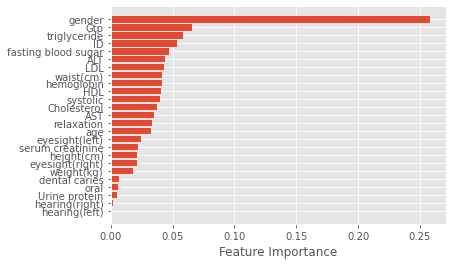

In [24]:
#feature_importances

sort = DTC.feature_importances_.argsort()
plt.barh(df.columns[sort], DTC.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [25]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

ypred = rf.predict(X_test)

print("Score the X-train with Y-train is : ", rf.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", rf.score(X_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,ypred)*100)

Score the X-train with Y-train is :  0.9999326644670392
Score the X-test  with Y-test  is :  0.9934464494119759
Accuracy Score : 99.34464494119759


In [26]:
rfclassification_report = classification_report(y_test, ypred)

# Print the training classification report
print(dtcclassification_report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7036
           1       0.92      0.91      0.91      4103

    accuracy                           0.94     11139
   macro avg       0.93      0.93      0.93     11139
weighted avg       0.94      0.94      0.94     11139



Text(0.5, 0, 'Feature Importance')

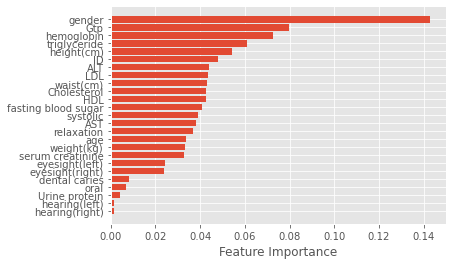

In [27]:
#feature_importances

sort = rf.feature_importances_.argsort()
plt.barh(df.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")